In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

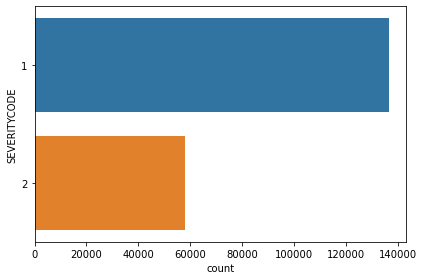

In [6]:
#characterstick graph
#severity vs count
sns.countplot(y = "SEVERITYCODE" , data = df )
plt.tight_layout()

In [17]:
df.shape

(194673, 38)

In [16]:
df.rename(columns={'SEVERITYCODE': 'severity_code', 'X':'longitude', 'Y': 'latitude',
                   'ADDRTYPE':'addr_type', 'LOCATION': 'location','SEVERITYDESC':'severity_desc', 'COLLISIONTYPE':'collision_type',
                   'PERSONCOUNT':'person_count', 'PEDCOUNT': 'ped_count', 'PEDCYLCOUNT': 'ped_cycle_count', 'VEHCOUNT': 'veh_count',
                   'INCDTTM': 'inc_dt', 'JUNCTIONTYPE': 'junc_type', 'SDOT_COLCODE': 'case_code', 'SDOT_COLDESC': 'case_desc',
                   'UNDERINFL':'under_infl', 'WEATHER': 'weather', 'ROADCOND': 'roadcond', 'LIGHTCOND': 'light_cond',
                   'ST_COLCODE': 'st_code', 'ST_COLDESC': 'st_desc', 'HITPARKEDCAR':'hit_parked_car', 'SPEEDING':'speeding', 
                   'FATALITIES':'fatalities', 'INJURIES':'injuries', 'SERIOUSINJURIES':'serious_injuries'}, inplace=True)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 194673)
pd.set_option('display.max_columns', 37)

In [19]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=10)
map_clust = MarkerCluster().add_to(map)
location = df[['latitude', 'longitude']][df['longitude'].notnull()][:5000]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_clust)
map

In [22]:
#severity_desc A detailed description of the severity of the collision

df['severity_code'].value_counts().to_frame('counts')

,counts
1,136485
2,58188


In [23]:
df['severity_desc'].value_counts().to_frame('counts')

,counts
Property Damage Only Collision,136485
Injury Collision,58188


1 - Property damage only collision(collison causing damages only to properties)
2 - injury collision(collison which caused injuries to the pedestrians or passenger involved in the collision)
0 - unknown
2b - the collision caused serious injuries to pedestrians or passengers
3 - the collision lead to some death

In [24]:
df['collision_type'].value_counts().to_frame('counts')

,counts
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [25]:
df['addr_type'].value_counts().to_frame('counts')

,counts
Block,126926
Intersection,65070
Alley,751


In [26]:
df['junc_type'].value_counts().to_frame('counts')

,counts
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [27]:
df['weather'].value_counts().to_frame('counts')

,counts
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [28]:
df['light_cond'].value_counts().to_frame('counts')

,counts
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [29]:
df[['person_count', 'ped_count', 'ped_cycle_count', 'veh_count']].describe()

,person_count,ped_count,ped_cycle_count,veh_count
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780
std,1.345929,0.198150,0.167413,0.631047
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


In [35]:


df = df[['longitude', 'latitude','location','severity_code',
        'severity_desc','collision_type', 'person_count', 'ped_count', 'ped_cycle_count',
       'veh_count','inc_dt','addr_type', 'junc_type', 'case_code', 'case_desc','under_infl',
       'speeding', 'weather', 'roadcond', 'light_cond','st_code', 'st_desc',
       'hit_parked_car']]



In [36]:
df.isnull().sum()

longitude            5334
latitude             5334
location             2677
severity_code           0
severity_desc           0
collision_type       4904
person_count            0
ped_count               0
ped_cycle_count         0
veh_count               0
inc_dt                  0
addr_type            1926
junc_type            6329
case_code               0
case_desc               0
under_infl           4884
speeding           185340
weather              5081
roadcond             5012
light_cond           5170
st_code                18
st_desc              4904
hit_parked_car          0
dtype: int64

In [37]:
df1 = df[['latitude', 'longitude', 'severity_code', 'weather', 'roadcond', 'light_cond', 
          'speeding', 'under_infl', 'person_count', 'ped_count', 'ped_cycle_count', 'veh_count', 
           'severity_desc']]



In [38]:
df1['speeding'].replace(np.nan,0,inplace=True)
df1['speeding'].replace('Y', 1, inplace=True)
df1['speeding'].value_counts().to_frame('counts')

,counts
0,185340
1,9333


In [39]:
df1.replace(to_replace={'Unknown': np.nan, 
                        'Other':np.nan}, inplace=True)

In [40]:
df1.dropna(inplace=True)

In [41]:
df1.isnull().sum()

latitude           0
longitude          0
severity_code      0
weather            0
roadcond           0
light_cond         0
speeding           0
under_infl         0
person_count       0
ped_count          0
ped_cycle_count    0
veh_count          0
severity_desc      0
dtype: int64

In [42]:
df1['under_infl'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)

In [43]:
df1['under_infl'].value_counts().to_frame('counts')

,counts
0,157473
1,8744


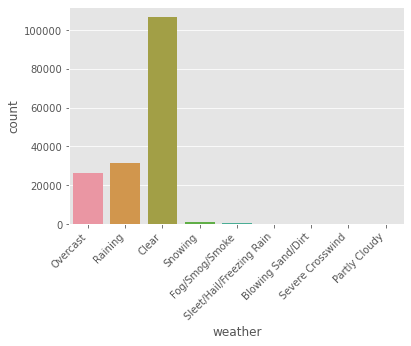

In [44]:
plt.style.use('ggplot')
ax = sns.countplot(df1['weather'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

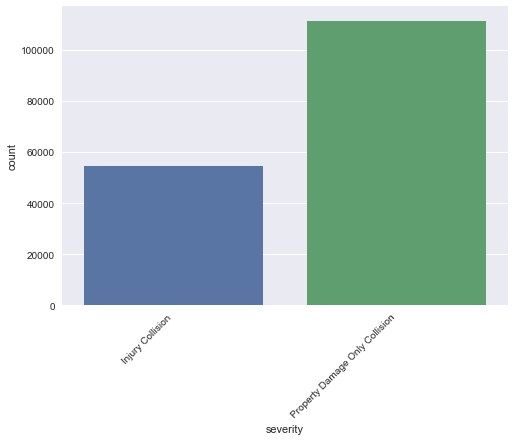

In [45]:
plt.style.use('seaborn')
ax = sns.countplot(df1['severity_desc'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('severity')
plt.show()

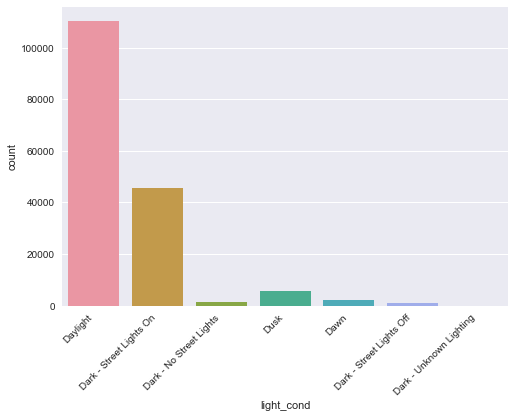

In [46]:


ax = sns.countplot(df1['light_cond'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



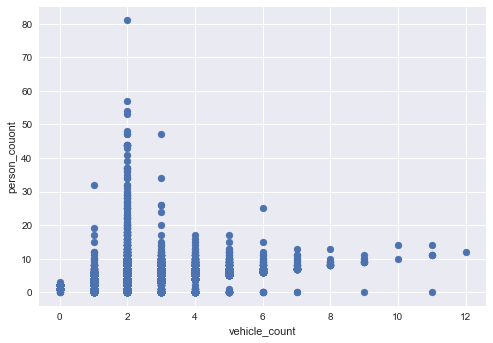

In [47]:
ax = plt.scatter(df1['veh_count'], df1['person_count'])
plt.xlabel('vehicle_count')
plt.ylabel('person_couont')
plt.show()

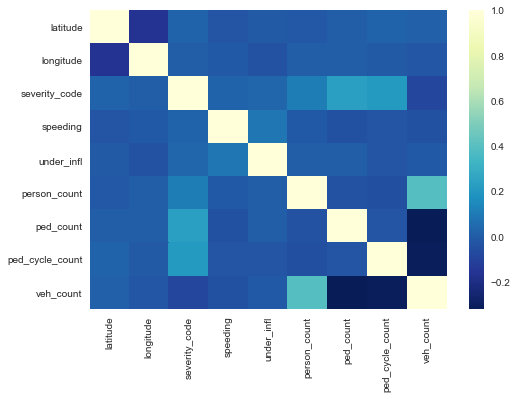

In [50]:
sns.heatmap(df1.corr(), cmap='YlGnBu_r')
plt.show()

In [51]:
df2 = pd.concat([df1.drop(['weather', 'roadcond', 'light_cond','severity_desc'], axis=1),
                 pd.get_dummies(df1['weather']),
                 pd.get_dummies(df1['roadcond']),
                 pd.get_dummies(df1['light_cond'])], axis=1)
df2.reset_index(drop=True, inplace=True)

In [52]:
df2.head().T

,0,1,2,3,4
latitude,47.703140,47.647172,47.607871,47.604803,47.545739
longitude,-122.323148,-122.347294,-122.334540,-122.334803,-122.306426
severity_code,2.000000,1.000000,1.000000,1.000000,2.000000
speeding,0.000000,0.000000,0.000000,0.000000,0.000000
under_infl,0.000000,0.000000,0.000000,0.000000,0.000000
person_count,2.000000,2.000000,4.000000,3.000000,2.000000
ped_count,0.000000,0.000000,0.000000,0.000000,0.000000
ped_cycle_count,0.000000,0.000000,0.000000,0.000000,0.000000
veh_count,2.000000,2.000000,3.000000,3.000000,2.000000
Blowing Sand/Dirt,0.000000,0.000000,0.000000,0.000000,0.000000


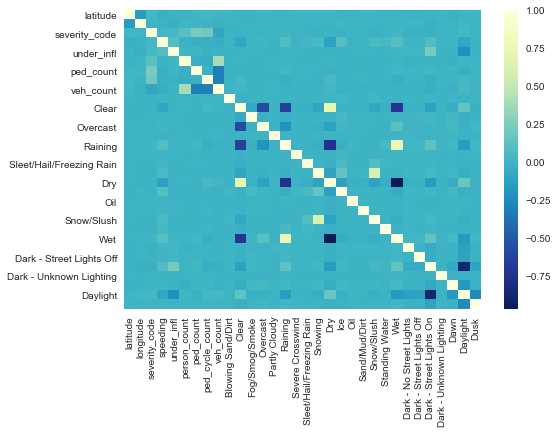

In [53]:
sns.heatmap(df2.corr(), cmap='YlGnBu_r')
plt.show()

In [54]:


x = df2.drop('severity_code', axis=1)
y = df2[['severity_code']]
X = StandardScaler().fit(x).transform(x)



In [55]:
X[:2]

array([[ 1.48575531,  0.24115727, -0.23209324, -0.23564163, -0.36264953,
        -0.19793337, -0.17999808,  0.04587593, -0.01589797, -1.33985345,
        -0.05693143,  2.30241411, -0.00548471, -0.48411165, -0.01201709,
        -0.02526119, -0.07010876, -1.59146902, -0.07992289, -0.01717214,
        -0.01835817, -0.07045456, -0.02378751,  1.64187829, -0.08991369,
        -0.08053056, -0.61505783, -0.00693774, -0.11941706,  0.71186295,
        -0.18554678],
       [ 0.49814816, -0.56875552, -0.23209324, -0.23564163, -0.36264953,
        -0.19793337, -0.17999808,  0.04587593, -0.01589797, -1.33985345,
        -0.05693143, -0.43432673, -0.00548471,  2.06563918, -0.01201709,
        -0.02526119, -0.07010876, -1.59146902, -0.07992289, -0.01717214,
        -0.01835817, -0.07045456, -0.02378751,  1.64187829, -0.08991369,
        -0.08053056,  1.62586339, -0.00693774, -0.11941706, -1.40476479,
        -0.18554678]])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:


tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(x_train, y_train)
print(tree_model)
yhat1 = tree_model.predict(x_test)
print('The accuracy of the decision tree classifier is {} with a max_depth of 5'.format(accuracy_score(y_test, yhat1)))



DecisionTreeClassifier(criterion='entropy', max_depth=5)
The accuracy of the decision tree classifier is 0.7284622789074721 with a max_depth of 5


In [58]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           1       0.73      0.96      0.83     22350
           2       0.74      0.26      0.39     10894

    accuracy                           0.73     33244
   macro avg       0.73      0.61      0.61     33244
weighted avg       0.73      0.73      0.68     33244



In [59]:


forest_model = RandomForestClassifier(n_estimators=75)
forest_model.fit(x_train, y_train)
print(forest_model)
yhat2 = forest_model.predict(x_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y_test, yhat2)))



RandomForestClassifier(n_estimators=75)
the accuracy score for Random Forest Classifier is 0.6821080495728552


In [60]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           1       0.74      0.82      0.78     22350
           2       0.52      0.41      0.46     10894

    accuracy                           0.68     33244
   macro avg       0.63      0.61      0.62     33244
weighted avg       0.67      0.68      0.67     33244



In [61]:


log_reg_model = LogisticRegression(C=0.01)
log_reg_model.fit(x_train, y_train)
print(log_reg_model)
yhat3 = log_reg_model.predict(x_test)
print('The accuracy score for logistic regression is{}'.format(accuracy_score(y_test, yhat3)))



LogisticRegression(C=0.01)
The accuracy score for logistic regression is0.728432198291421


In [62]:
print(classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           1       0.72      0.98      0.83     22350
           2       0.81      0.22      0.35     10894

    accuracy                           0.73     33244
   macro avg       0.77      0.60      0.59     33244
weighted avg       0.75      0.73      0.67     33244



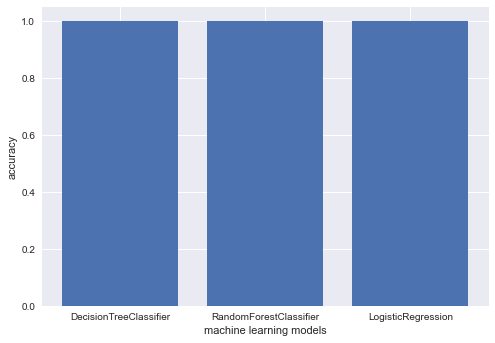

In [63]:
plt.bar(['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'], [1.,1.,1.])
plt.ylabel('accuracy')
plt.xlabel('machine learning models')
plt.show()